# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Zahra Sorkhei
2.   Student Number: 98101725 


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW1-DL

Mounted at /content/drive
/content/drive/MyDrive/HW1-DL


In [3]:
dataset = pd.read_csv("./data/data01.csv")
dataset= dataset.to_numpy()
dataset=dataset[:,1:]
train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]


# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = train[: , :-1]

y_train = train[: , -1]


x_test = test[: , :-1]
y_test = test[: , -1]



### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [4]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
def linearRegression(x, y):
  xy = []
  for i, val in enumerate(x):
      xy.append(x[i] * y[i])

  x_2 = [i**2 for i in x]
  n  = len(x)
  b_1 = (n*sum(xy) - sum(x)*sum(y)) / (n*sum(x_2) - sum(x)**2)
  b_0 = (sum(y) - b_1*sum(x))/n
  return (b_1, b_0)
m = linearRegression(x_train,y_train)

print(m)

(array([-1.02641738]), array([0.81500634]))


In [5]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y,y_train)
test_error = mean_squared_error(predicted_test_y,y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

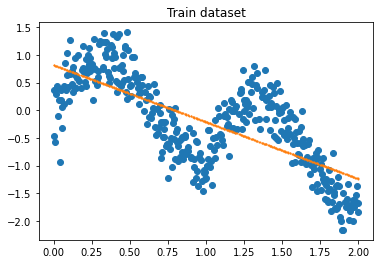

In [6]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

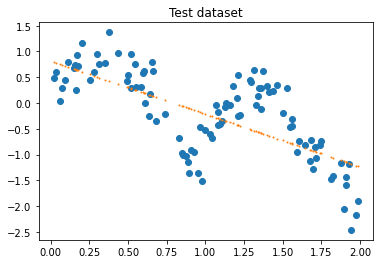

In [7]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

The stated loss is not too much and is almost acceptable, and this is due to the adaptation of the line to the average data


What about the line you drew in the last part?

When y is the average shape, it is suitable, but in any case, we have relatively  non-compliance in many places.

Was it appropriate for the dataset?

No, because the data has a curved shape in many places and modeling it with a line has many errors.
<br><br/>
Explain what are the main problems here.

Linear regression has one problem, is that it tends to underfit the data. It gives us the lowest mean-squared error for unbiased estimators. Hence with underfitting, we aren’t getting the best predictions. we assumed the model to be simple.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

The locally weighted method performs a regression around the point of interest using only training data that are "local" to that point, and thus can reduce the impact of noise from unrelated training data. So LWLR will have less loss and not have underfitting

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [62]:
def get_weight_matrix(the_query_point, train_dataset, tau):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    query=[]
    query.append(the_query_point[0,0].flatten()[0])
    query.append(the_query_point[0,1])
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1*((xi-query).T@(xi-query))/(2*tau**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [63]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))


    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.inv(X.T@W@X)@((X.T@W@train_Y).T)
    #print("*  ", np.dot(qx, theta))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [78]:
hyperparameter=0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
p_test=np.concatenate( predicted_test, axis=0 )
error =   mean_squared_error(p_test,y_test)
print(f"MSE test error: {error}")

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.10590729682860234


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


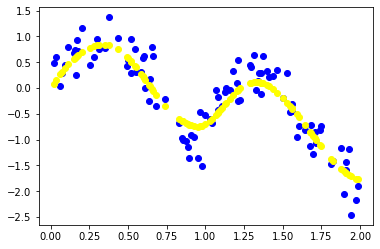

In [76]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.


Yes. It has the necessary curvature to estimate the function and has paid enough attention to the details and does not have overfitting.Also, we have less loss

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, we do not have predicted changes in some points, and using the changes of the neighbors of a point helps in getting a better estimate.

### Part10:
Implementing the `KNN model`.

In [80]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
      dist = 0.0
      for i in range(len(x2)):
        dist += (x1[i] - x2[i])**2
        #print(i)
        #print(x1[i] - x2[i])
      dist = np.sqrt(dist) # implement the distance function
      return dist

    def return_nn_ids(self, x):
      distances = list()
      j=0
      for train_row in self.X:
        dist = self.distance( train_row ,x)
        distances.append((self.Y[j], dist))
        #print(dist)
        j+=1
      distances.sort(key=lambda w:w[1])
      indices = list()
      for i in range(self.k):
        #print(distances[i][0])
        indices.append(distances[i][0])
      # find indices of k nearest neighbours to x
      return indices

    def predict(self, x):
      neareest_indices = self.return_nn_ids(x)
      predicted_y =np.mean(neareest_indices)  
      return predicted_y

In [81]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error =  mean_squared_error(predicted_y ,y_test)
    return   error,predicted_y

In [82]:
k = 5
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)

print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09998578918819372


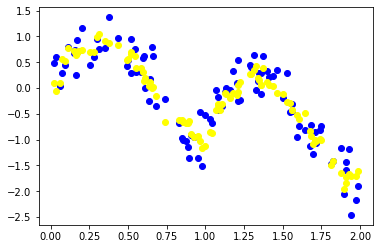

In [83]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

In [84]:
error = 1000000
best_k=0
for k in range(1,100):
  err=[]
  for i in range(5):
    xx_train = x_train[np.r_[0:i*int(len(x_train)/5),(i+1)*int(len(x_train)/5):len(x_train)]]
    yy_train = y_train[np.r_[0:i*int(len(x_train)/5),(i+1)*int(len(x_train)/5):len(x_train)]]
    x_val =x_train[np.r_[i*int(len(x_train)/5):(i+1)*int(len(x_train)/5)]]
    y_val =y_train[np.r_[i*int(len(x_train)/5):(i+1)*int(len(x_train)/5)]]
    error_knn, predicted_y = evaluation(k, xx_train, yy_train, x_val, y_val)
    err.append(error_knn)
  print("error for k= ",k," is ", np.mean(err))
  if(np.mean(err)<error):
    error=np.mean(err)
    best_k=k
print("k for best accuracy by KNN is: ", best_k, " and error of that is: ",error)    



error for k=  1  is  0.18156230916524127
error for k=  2  is  0.1324494343306188
error for k=  3  is  0.11288726769313169
error for k=  4  is  0.10197534972778222
error for k=  5  is  0.09812821524433994
error for k=  6  is  0.09844163313878147
error for k=  7  is  0.09596216754522938
error for k=  8  is  0.09378396354728953
error for k=  9  is  0.09348196418423205
error for k=  10  is  0.09212804299531918
error for k=  11  is  0.09266761286862198
error for k=  12  is  0.09205262573949778
error for k=  13  is  0.09177367887091595
error for k=  14  is  0.09132017609378947
error for k=  15  is  0.0917857172919641
error for k=  16  is  0.09123584062916552
error for k=  17  is  0.09138457855198831
error for k=  18  is  0.09160094353343678
error for k=  19  is  0.09192044465095013
error for k=  20  is  0.09250541402062351
error for k=  21  is  0.0932855735616096
error for k=  22  is  0.09363815709708505
error for k=  23  is  0.09377773509048566
error for k=  24  is  0.0934903709288887
error

MSE error of KNN for test dataset: 0.0985600173781031


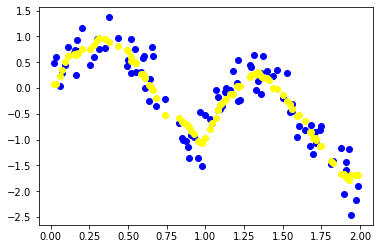

In [85]:
k = 16
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)

print(f"MSE error of KNN for test dataset: {error_knn}")
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")


According to the graph, the changes in the test data are well predicted. 
We also have the general form of the function and do not get involved in details and overfitting.We have the lowest loss in all steps.